# Preprocessing(2) & Analysis 

## Importing Necessary Libraries

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sb
from sklearn.model_selection import train_test_split

import re
import joblib
from sklearn.model_selection import train_test_split
import ast
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Data 

In [146]:
df = pd.read_csv('preprocessed_game_info.csv')

In [147]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            print(f"Conversion failed for column: {column}")

Conversion failed for column: NAME
Conversion failed for column: DEVELOPERS


In [148]:
technologies = [col for col in df.columns if col.startswith('TECH')]
genres = [col for col in df.columns if col.startswith('GENRE')]
platforms = [col for col in df.columns if col.startswith('OS')]

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

categorical_features = [col for col in categorical_features if col not in technologies + genres + platforms]
numerical_features = [col for col in numerical_features if col not in technologies + genres + platforms]

# print("Technologies:", technologies)
# print("Genres:", genres)
# print("Platforms:", platforms)
# print("Categorical Features:", categorical_features)
# print("Numerical Features:", numerical_features)

## Initial Data Exploration

In [149]:
df.head()

,NAME,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,PRICE,24_HOUR_PEAK,PUBLISH_YEAR,RATING_SCORE,TOTAL_RATE_SUM,...,GENRE: Massively Multiplayer,GENRE: RPG,GENRE: Racing,GENRE: Simulation,GENRE: Sports,GENRE: Store Genres,GENRE: Strategy,OS: Linux,OS: Windows,OS: macOS
0,dragon's dogma: dark arisen,7,Capcom,39271,5015,NaN,1064.0,2016,0.886759,44286,...,0,1,0,0,0,0,0,0,1,0
1,forza horizon 5,24,Playground Games,156683,21075,NaN,16131.0,2021,0.881440,177758,...,0,0,1,1,1,0,0,0,1,0
2,thrive,1,Revolutionary Games Studio,872,70,4.99,21.0,2021,0.925690,942,...,0,0,0,1,0,0,0,1,1,0
3,layers of fear (2016),12,Bloober Team SA,22766,2819,NaN,31.0,2016,0.889818,25585,...,0,0,0,0,0,0,0,1,1,1
4,taskpals,1,lazarche,834,66,NaN,318.0,2023,0.926667,900,...,0,0,0,0,0,0,0,0,1,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NAME                          2032 non-null   object 
 1   N_SUPPORTED_LANGUAGES         2032 non-null   int64  
 2   DEVELOPERS                    2032 non-null   object 
 3   POSITIVE_REVIEWS              2032 non-null   int64  
 4   NEGATIVE_REVIEWS              2032 non-null   int64  
 5   PRICE                         1257 non-null   float64
 6   24_HOUR_PEAK                  2032 non-null   float64
 7   PUBLISH_YEAR                  2032 non-null   int64  
 8   RATING_SCORE                  2032 non-null   float64
 9   TOTAL_RATE_SUM                2032 non-null   int64  
 10  TWITCH_PEAK_HOUR              2032 non-null   float64
 11  TWITCH_PEAK_YEAR              2032 non-null   int64  
 12  TECH:                         2032 non-null   int64  
 13  TEC

## Plot the Count of Unique Values for Each Feature 

In [151]:
unique_counts_categorical = df[categorical_features].nunique()
unique_counts_numerical = df[numerical_features].nunique()

tech_count = len(technologies)
genre_count = len(genres)
platform_count = len(platforms)

counts = pd.concat([unique_counts_categorical, unique_counts_numerical])
counts['Technologies'] = tech_count
counts['Genres'] = genre_count
counts['Platforms'] = platform_count

feature_colors = sns.color_palette('hls', n_colors=len(categorical_features) + len(numerical_features) + 3)
features = counts.index.tolist()
feature_color_map = dict(zip(features, feature_colors))
feature_color_map
colors = [feature_color_map[feature] for feature in features]


In [152]:
features

['NAME',
 'DEVELOPERS',
 'N_SUPPORTED_LANGUAGES',
 'POSITIVE_REVIEWS',
 'NEGATIVE_REVIEWS',
 'PRICE',
 '24_HOUR_PEAK',
 'PUBLISH_YEAR',
 'RATING_SCORE',
 'TOTAL_RATE_SUM',
 'TWITCH_PEAK_HOUR',
 'TWITCH_PEAK_YEAR',
 'Technologies',
 'Genres',
 'Platforms']

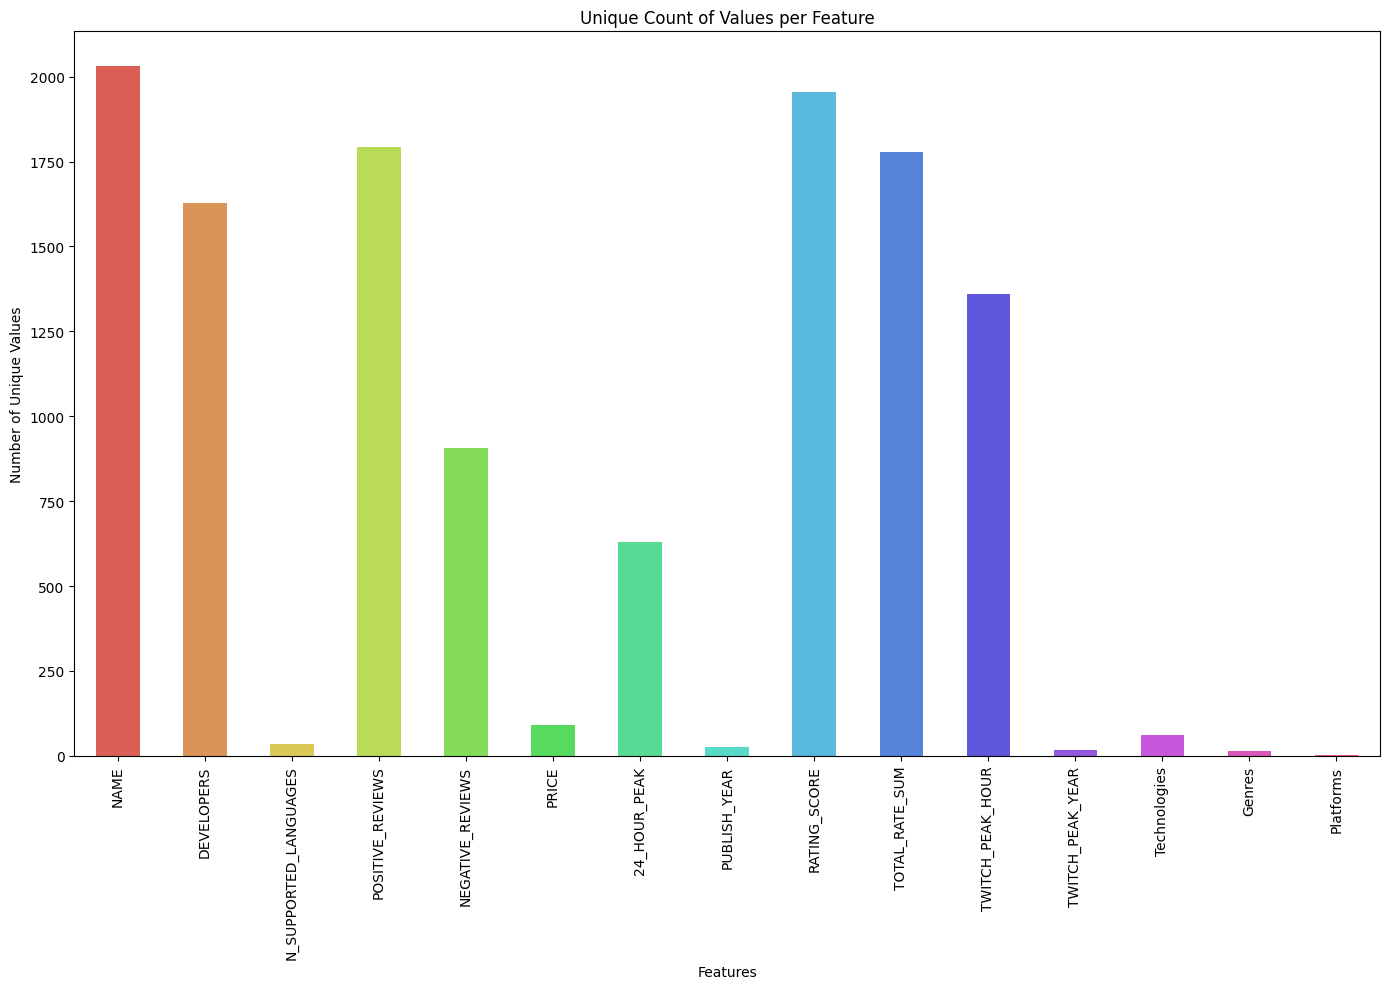

In [153]:
plt.figure(figsize=(14, 10))
counts.plot(kind='bar', color=colors)
plt.title('Unique Count of Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Outlier Detection and Handling

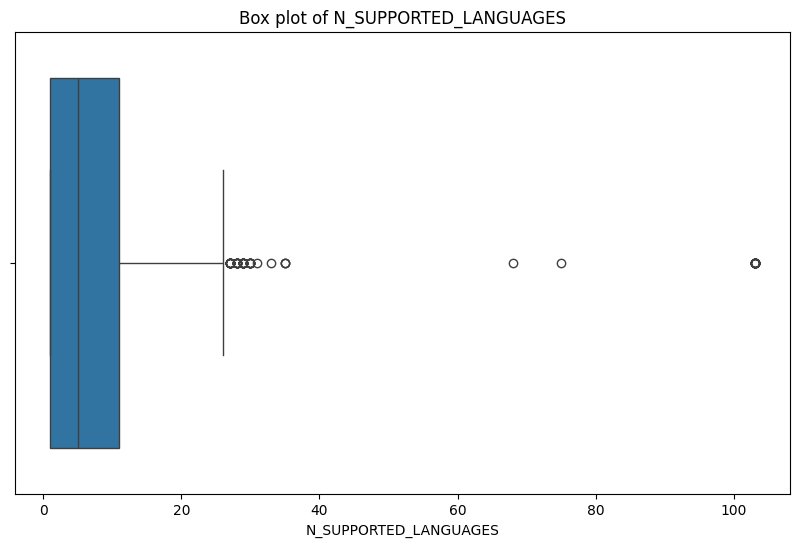

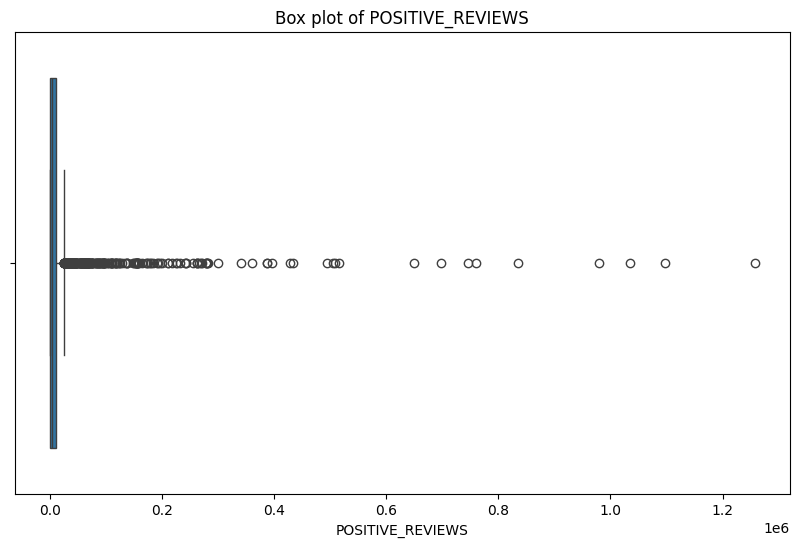

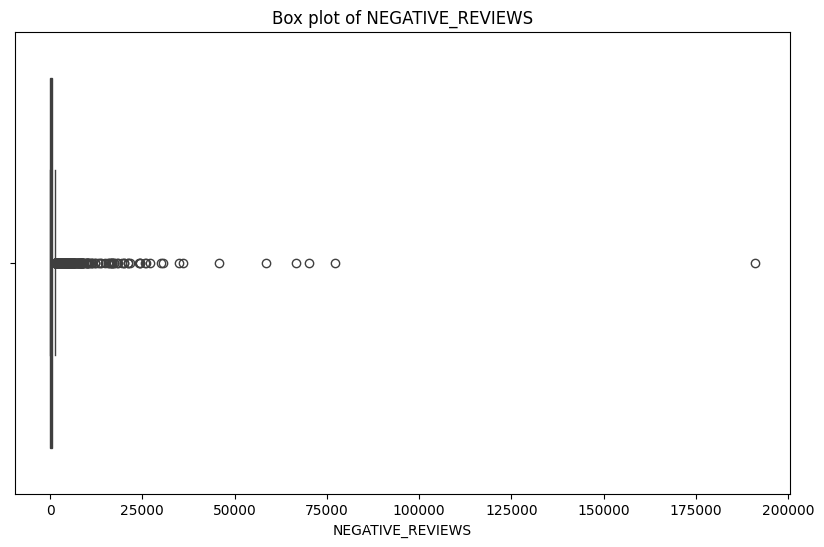

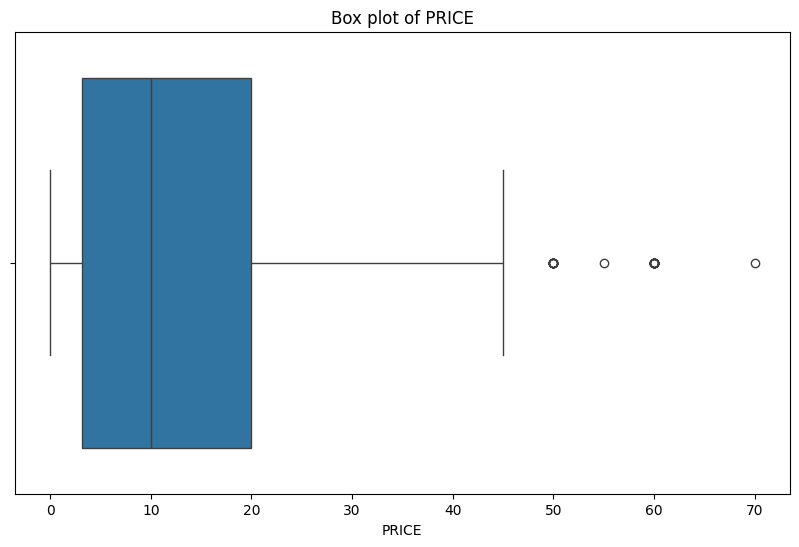

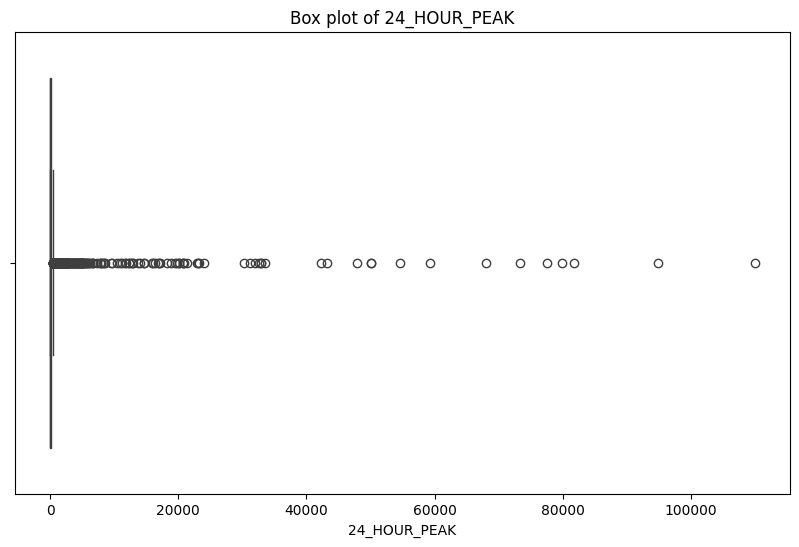

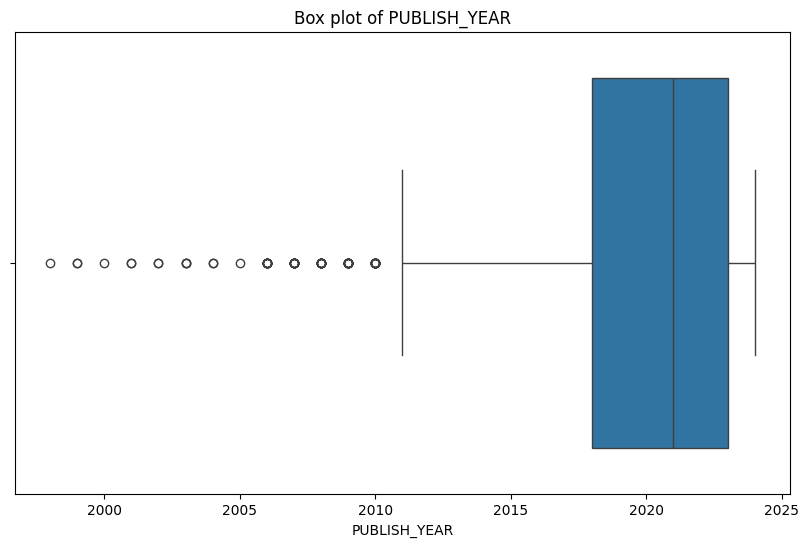

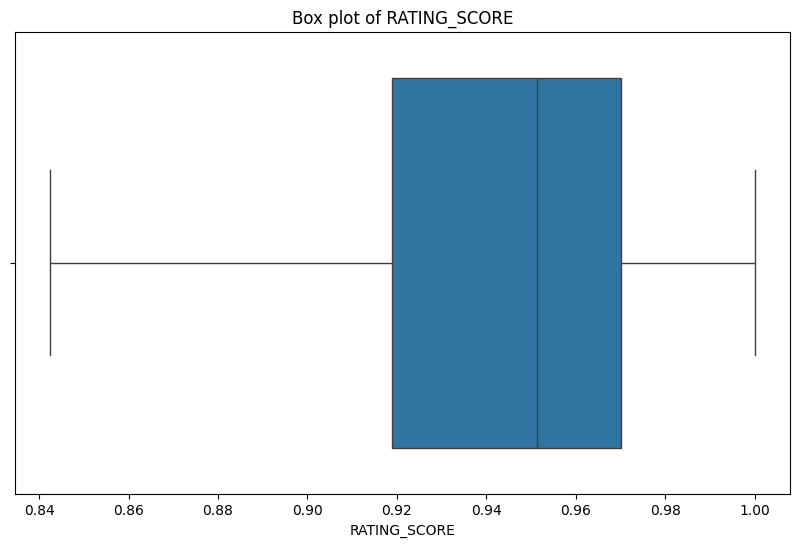

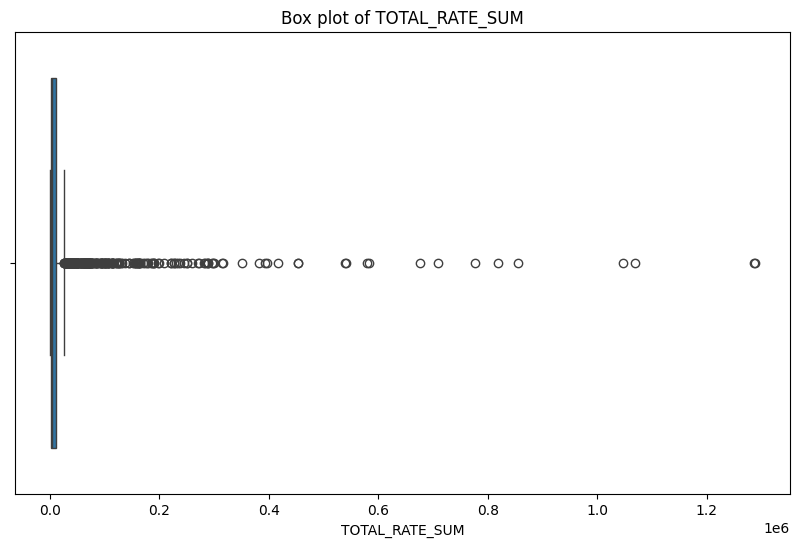

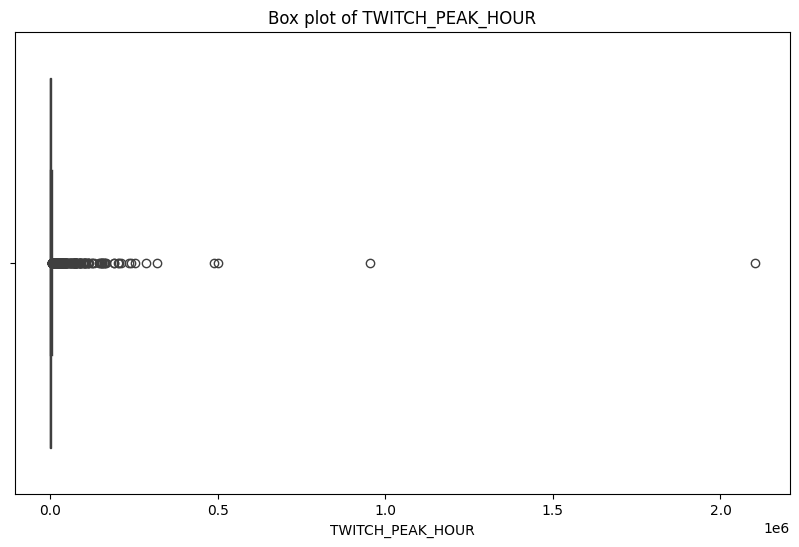

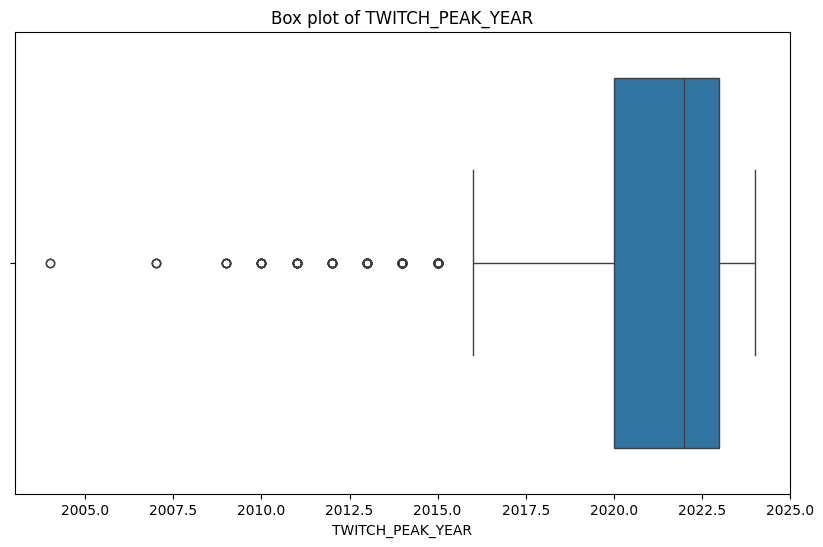

In [154]:
methods = {}

for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

    mean = df[column].mean()
    median = df[column].median()
    std = df[column].std()
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    if len(outliers) / len(df) < 0.05:
        if abs(mean - median) / std > 0.5:
            methods[column] = 'transform'
        else:
            methods[column] = 'remove'
    else:
        methods[column] = 'cap'

In [155]:
methods

{'N_SUPPORTED_LANGUAGES': 'remove',
 'POSITIVE_REVIEWS': 'cap',
 'NEGATIVE_REVIEWS': 'cap',
 'PRICE': 'remove',
 '24_HOUR_PEAK': 'cap',
 'PUBLISH_YEAR': 'remove',
 'RATING_SCORE': 'remove',
 'TOTAL_RATE_SUM': 'cap',
 'TWITCH_PEAK_HOUR': 'cap',
 'TWITCH_PEAK_YEAR': 'cap'}

**Outlier Handling Suggestions:**
- Transform: Suggested if there is a significant skew in the data (mean and median are far apart relative to the standard deviation).
- Remove: Suggested if the number of outliers is low and the data distribution is not heavily skewed.
- Cap: Suggested if the number of outliers is high, indicating that simply removing them might lead to loss of significant data.

In [156]:
# def handle_outliers(df, methods, exclude_columns=[]):

#     df_cleaned = df.copy()  
    
#     for column, method in methods.items():
#         if column in exclude_columns:
#             continue
        
#         Q1 = df_cleaned[column].quantile(0.25)
#         Q3 = df_cleaned[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         if method == 'remove':
#             df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
#         elif method == 'cap':
#             df_cleaned[column] = df_cleaned[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
#         elif method == 'transform':
#             df_cleaned[column] = np.log1p(df_cleaned[column])  
#         else:
#             raise ValueError("Method must be either 'remove', 'cap', or 'transform'")
    
#     return df_cleaned

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NAME                          2032 non-null   object 
 1   N_SUPPORTED_LANGUAGES         2032 non-null   int64  
 2   DEVELOPERS                    2032 non-null   object 
 3   POSITIVE_REVIEWS              2032 non-null   int64  
 4   NEGATIVE_REVIEWS              2032 non-null   int64  
 5   PRICE                         1257 non-null   float64
 6   24_HOUR_PEAK                  2032 non-null   float64
 7   PUBLISH_YEAR                  2032 non-null   int64  
 8   RATING_SCORE                  2032 non-null   float64
 9   TOTAL_RATE_SUM                2032 non-null   int64  
 10  TWITCH_PEAK_HOUR              2032 non-null   float64
 11  TWITCH_PEAK_YEAR              2032 non-null   int64  
 12  TECH:                         2032 non-null   int64  
 13  TEC

## Normalization/Standardization

## Split the dataset into training and testing sets


In [158]:
X = df.drop(columns=['24_HOUR_PEAK'])
y = df['24_HOUR_PEAK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
del df
df = pd.concat([X_train, y_train], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 1684 to 1126
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NAME                          1625 non-null   object 
 1   N_SUPPORTED_LANGUAGES         1625 non-null   int64  
 2   DEVELOPERS                    1625 non-null   object 
 3   POSITIVE_REVIEWS              1625 non-null   int64  
 4   NEGATIVE_REVIEWS              1625 non-null   int64  
 5   PRICE                         1004 non-null   float64
 6   PUBLISH_YEAR                  1625 non-null   int64  
 7   RATING_SCORE                  1625 non-null   float64
 8   TOTAL_RATE_SUM                1625 non-null   int64  
 9   TWITCH_PEAK_HOUR              1625 non-null   float64
 10  TWITCH_PEAK_YEAR              1625 non-null   int64  
 11  TECH:                         1625 non-null   int64  
 12  TECH: ,                       1625 non-null   int64  
 13  TECH:

# Analysis 

In [160]:
target_column = '24_HOUR_PEAK'


## Correlation Heatmap

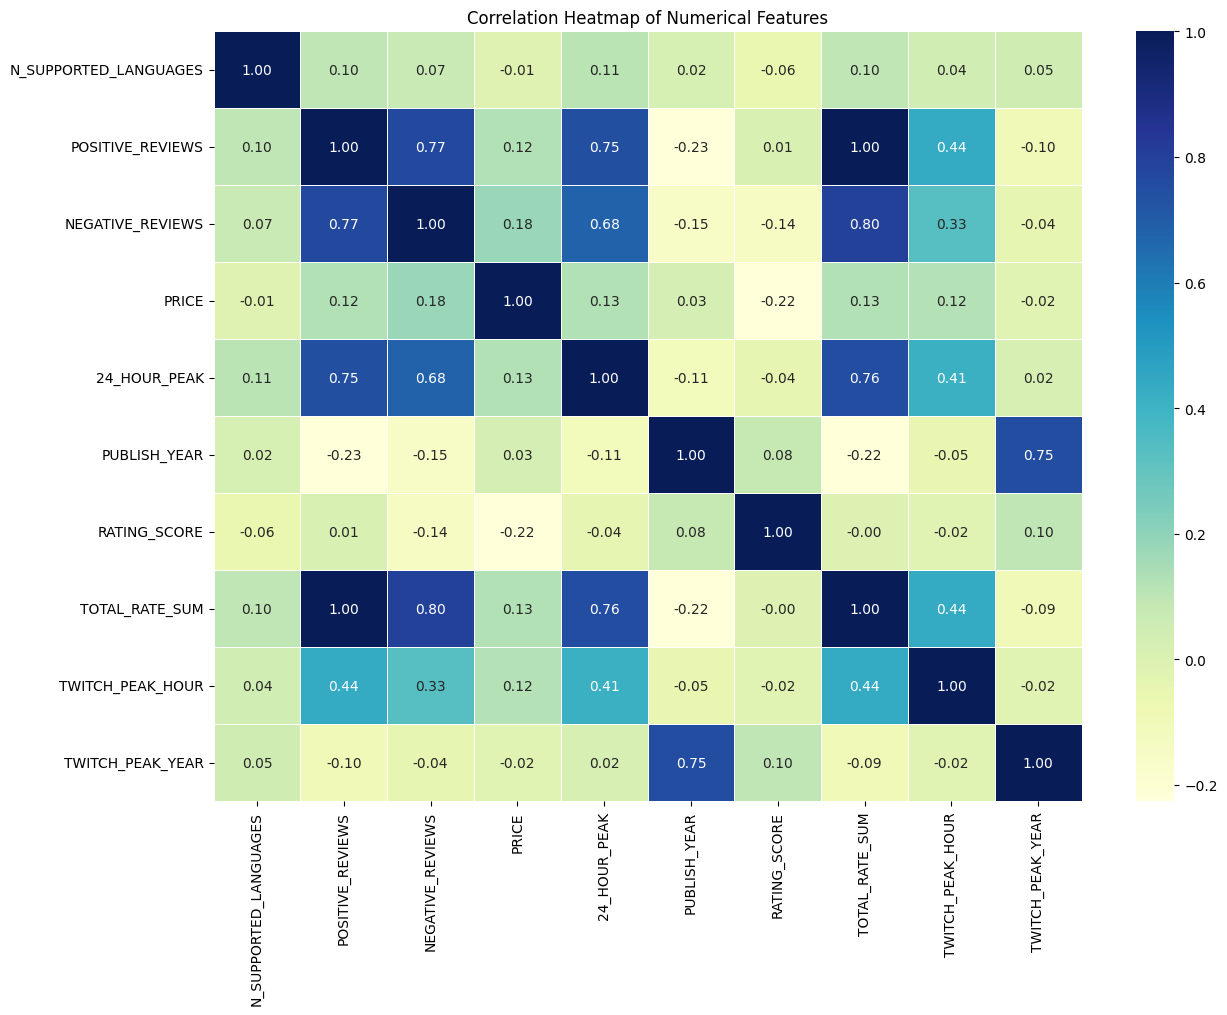

In [161]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [162]:
correlations_with_target = df[numerical_features + [target_column]].corr()[target_column].drop(target_column)

print("Correlation of numerical features with the target variable '24_HOUR_PEAK':")
print(correlations_with_target)


Correlation of numerical features with the target variable '24_HOUR_PEAK':
                       24_HOUR_PEAK  24_HOUR_PEAK
N_SUPPORTED_LANGUAGES      0.108693      0.108693
POSITIVE_REVIEWS           0.748244      0.748244
NEGATIVE_REVIEWS           0.679381      0.679381
PRICE                      0.125299      0.125299
PUBLISH_YEAR              -0.111547     -0.111547
RATING_SCORE              -0.040766     -0.040766
TOTAL_RATE_SUM             0.755389      0.755389
TWITCH_PEAK_HOUR           0.413839      0.413839
TWITCH_PEAK_YEAR           0.016163      0.016163


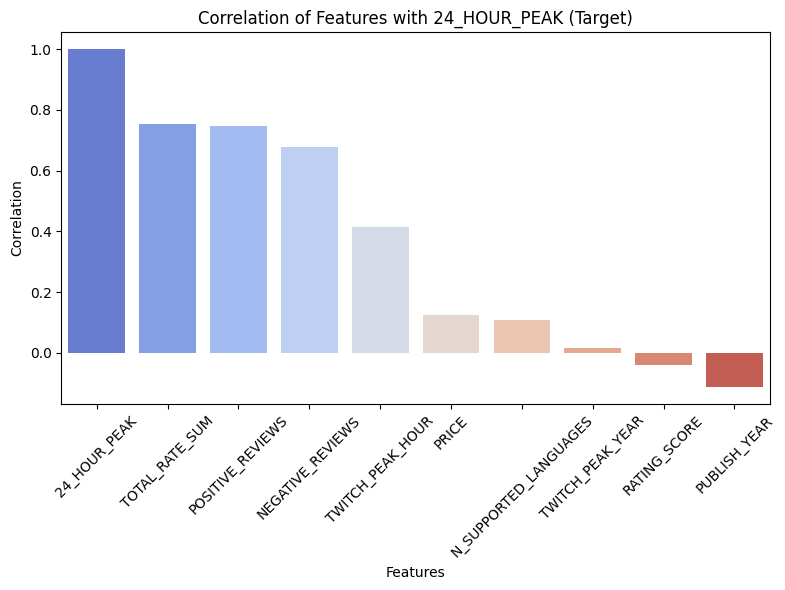

In [163]:
target_corr =  correlation_matrix[target_column].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.index, y=target_corr, palette='coolwarm')
plt.title('Correlation of Features with 24_HOUR_PEAK (Target)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Histograms

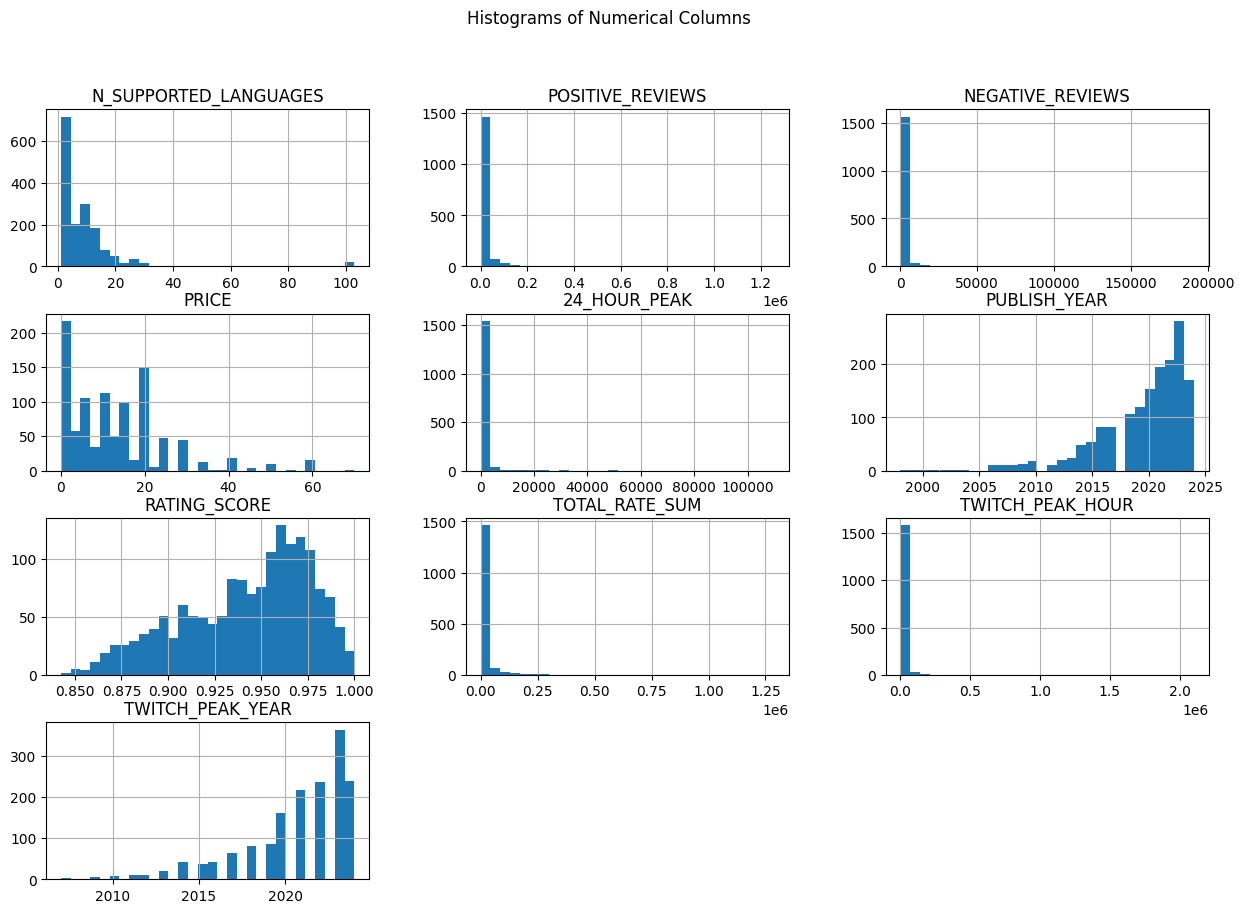

In [164]:
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

##  Plot pair plot

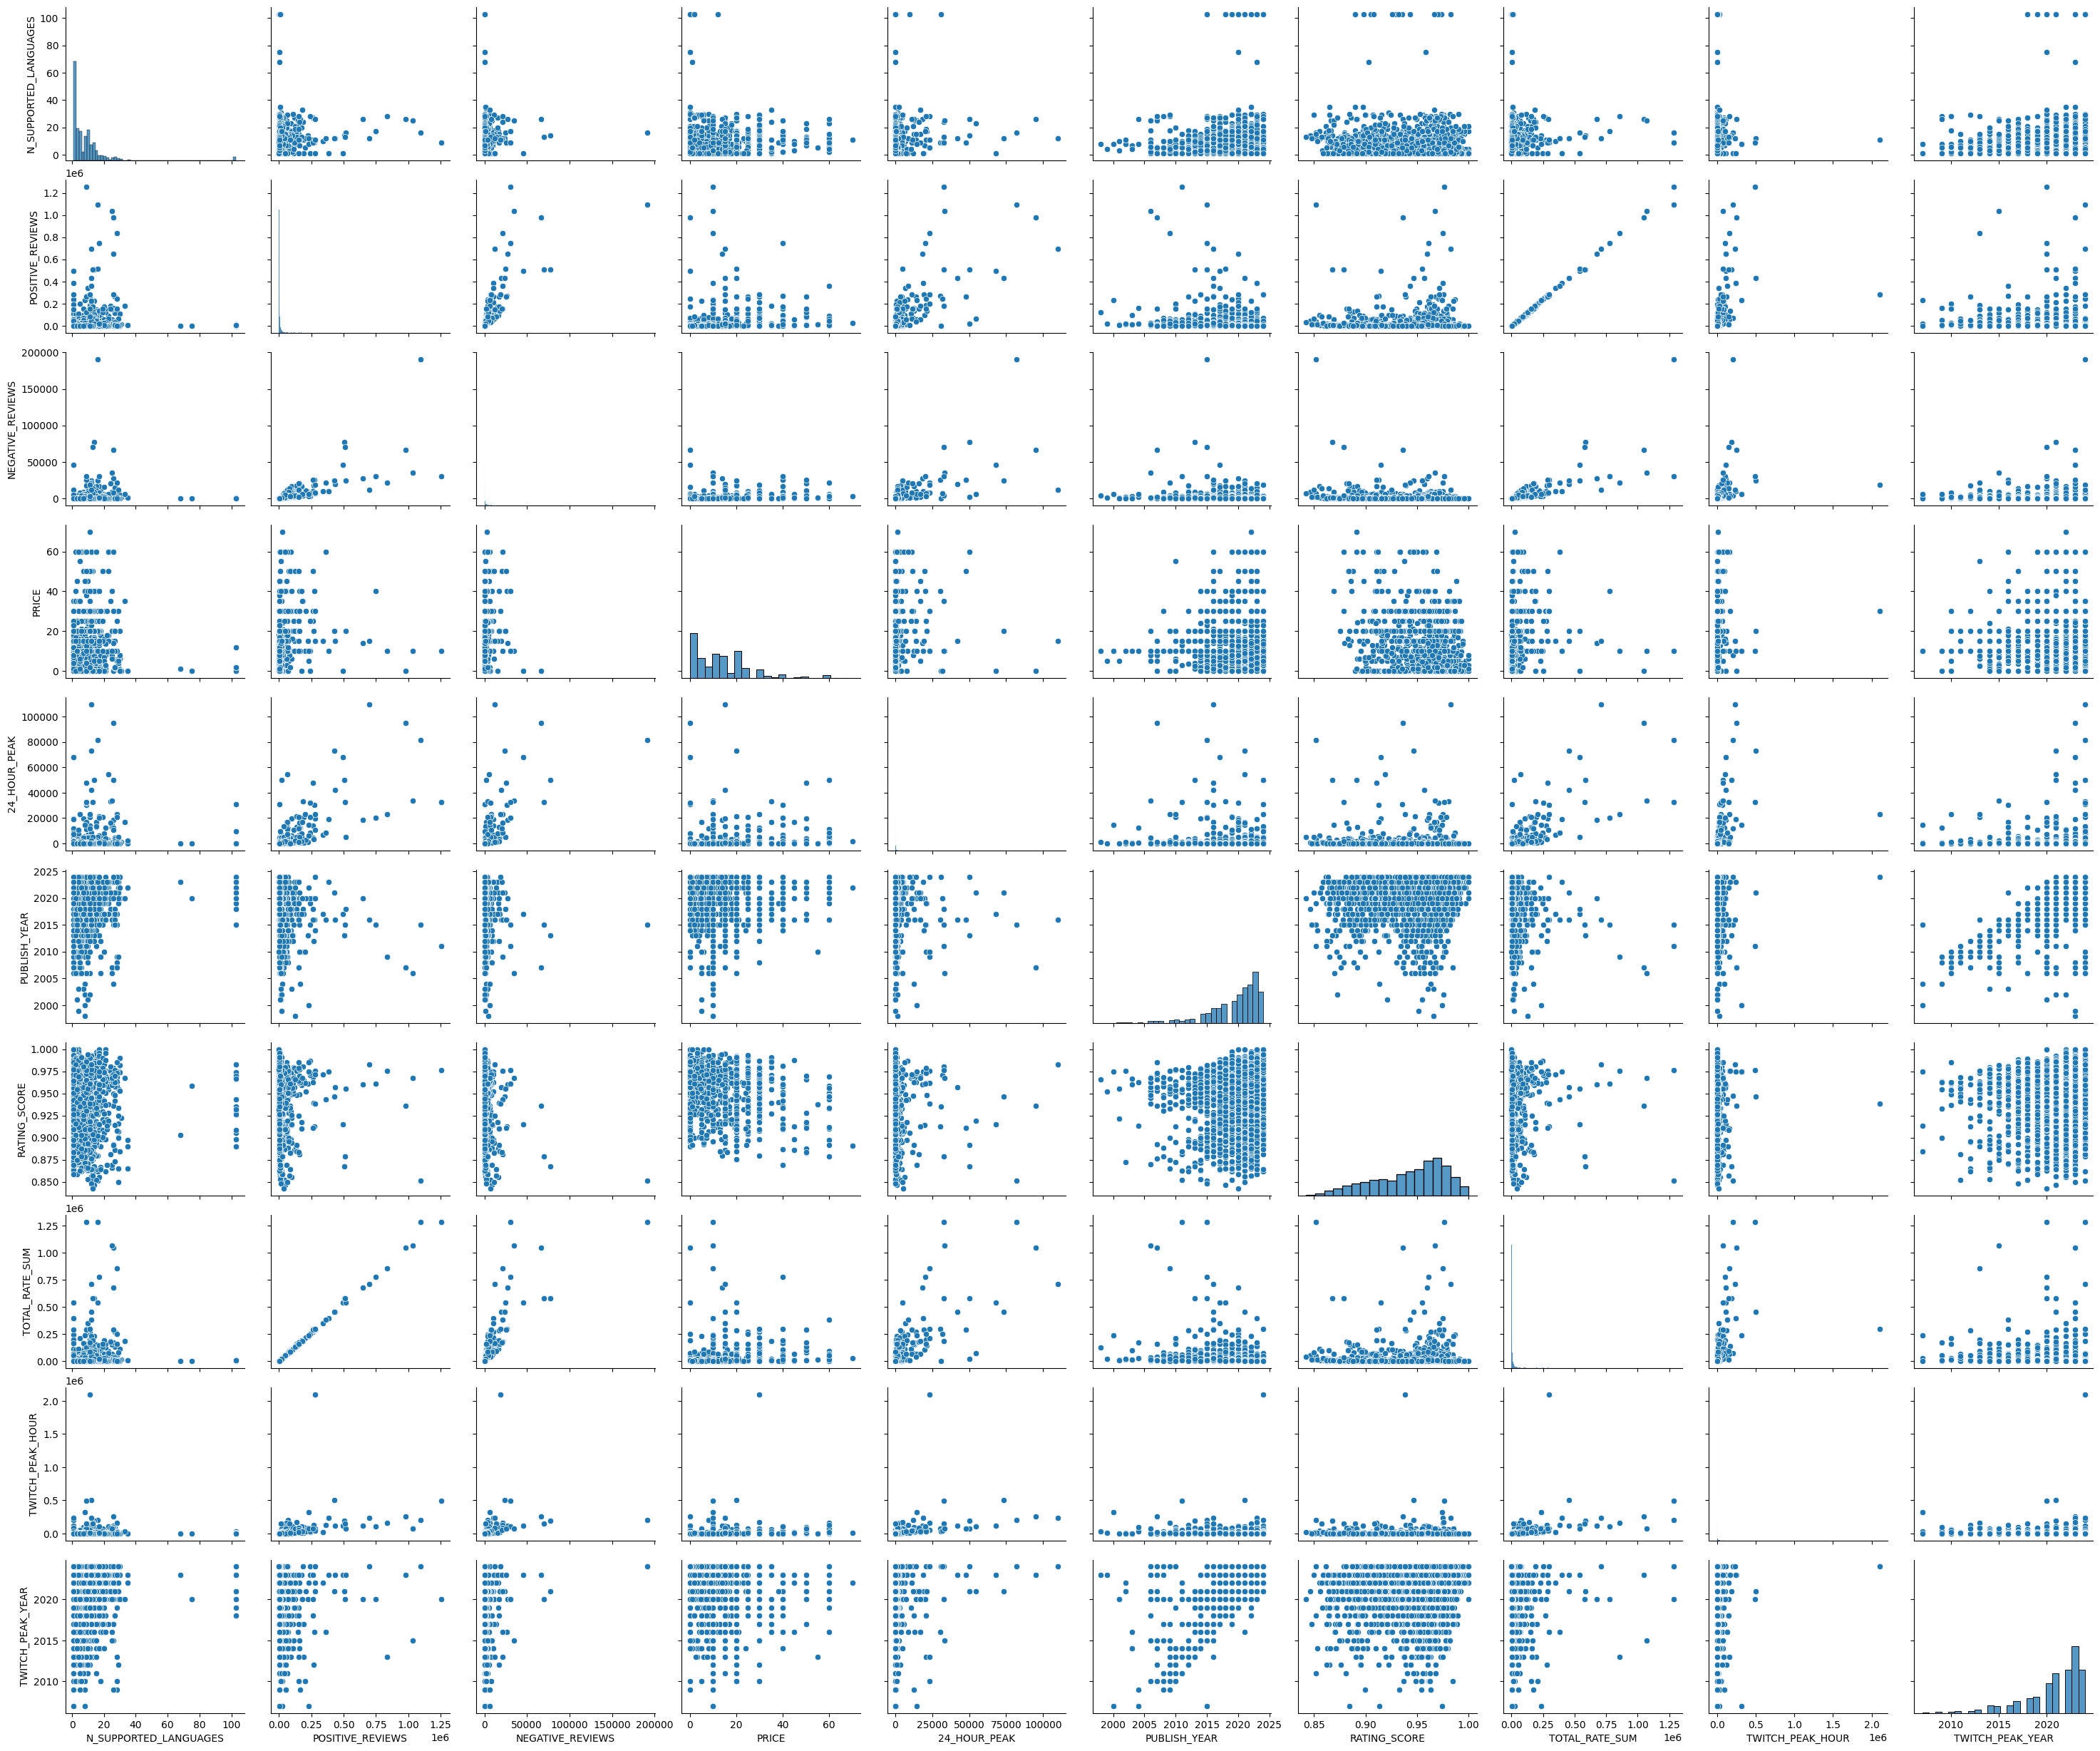

In [165]:
sns.pairplot(df[numerical_features], height=2.5, aspect=1.2)
plt.show()

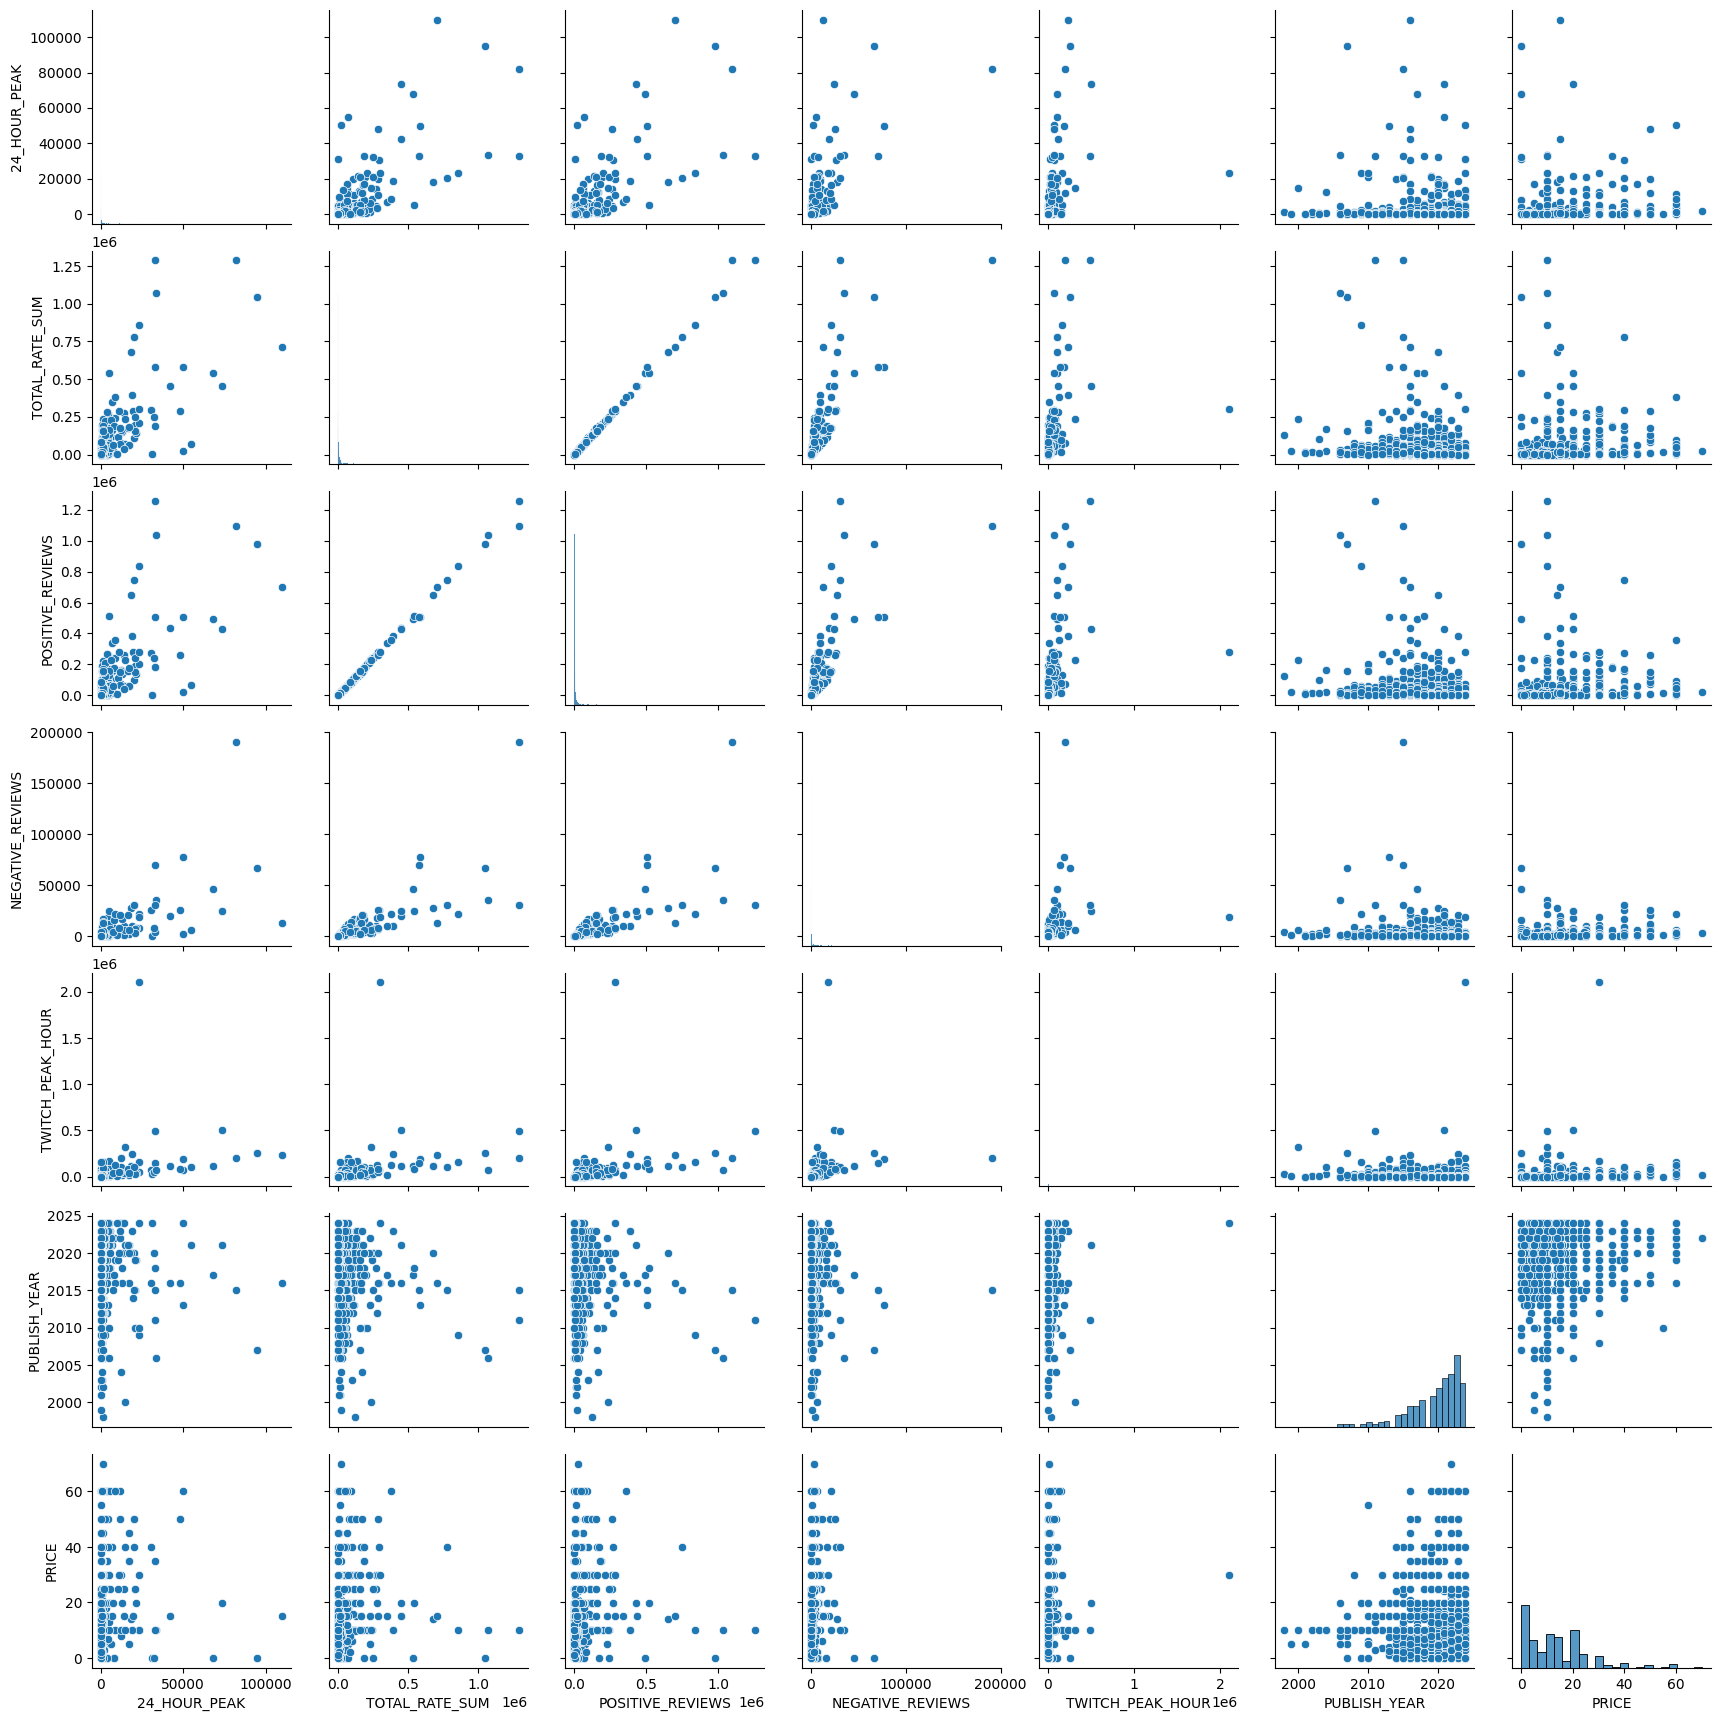

In [166]:
selected_features = ['24_HOUR_PEAK', 'TOTAL_RATE_SUM', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS', 'TWITCH_PEAK_HOUR', 'PUBLISH_YEAR', 'PRICE']

sns.pairplot(df[selected_features])
plt.show()

## Scatter Plots

### Summary statistics for the `24_HOUR_PEAK` column

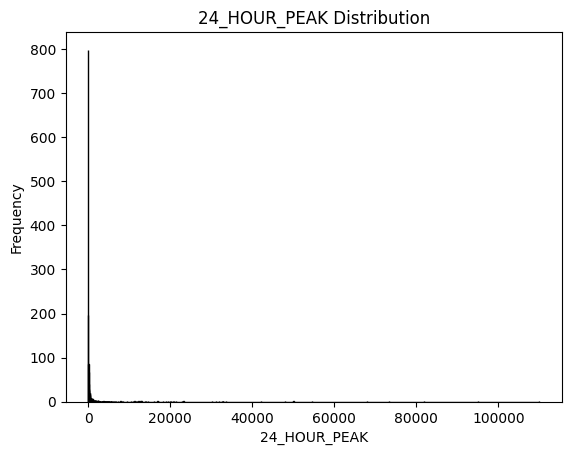

In [167]:
plt.hist(df['24_HOUR_PEAK'], bins='auto', color=feature_color_map['24_HOUR_PEAK'], edgecolor='black')
plt.xlabel('24_HOUR_PEAK')
plt.ylabel('Frequency')
plt.title('24_HOUR_PEAK Distribution')
plt.show()

In [168]:
df['24_HOUR_PEAK'].describe()

count      1625.000000
mean       1183.923692
std        6323.843156
min           0.000000
25%          10.000000
50%          36.000000
75%         213.000000
max      109950.000000
Name: 24_HOUR_PEAK, dtype: float64

### Summary statistics for the `PRICE` column

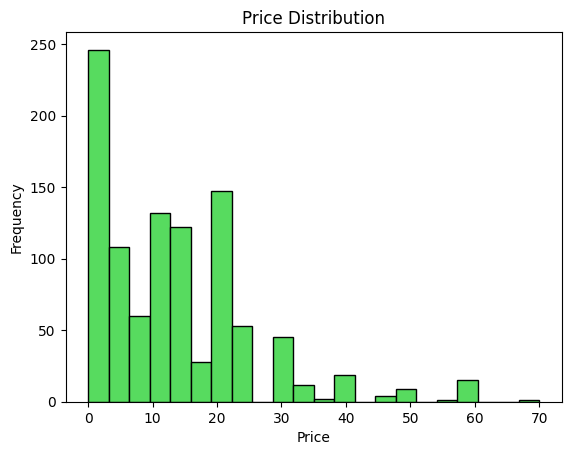

In [169]:
plt.hist(df['PRICE'], bins='auto', color=feature_color_map['PRICE'], edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

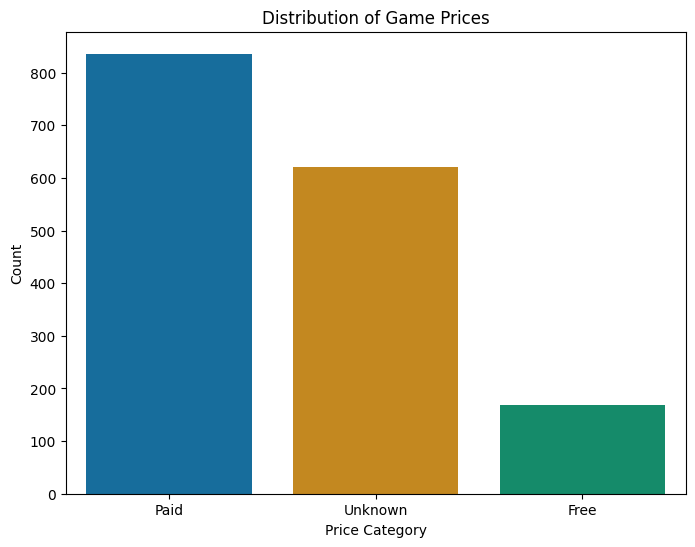

In [170]:
def categorize_price(price):
    if pd.isna(price):
        return "Unknown"
    elif price == 0:
        return "Free"
    else:
        return "Paid"

df = df.assign(PRICE_CATEGORY=df['PRICE'].apply(categorize_price))

price_category_counts = df['PRICE_CATEGORY'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=price_category_counts.index, y=price_category_counts.values, palette='colorblind')

plt.xlabel('Price Category')
plt.ylabel('Count')
plt.title('Distribution of Game Prices')
plt.show()

In [171]:
df['PRICE'].describe()

count    1004.000000
mean       13.234910
std        12.285193
min         0.000000
25%         3.990000
50%         9.990000
75%        19.990000
max        69.990000
Name: PRICE, dtype: float64

###  Summary statistics for the `PUBLISH_YEAR` column

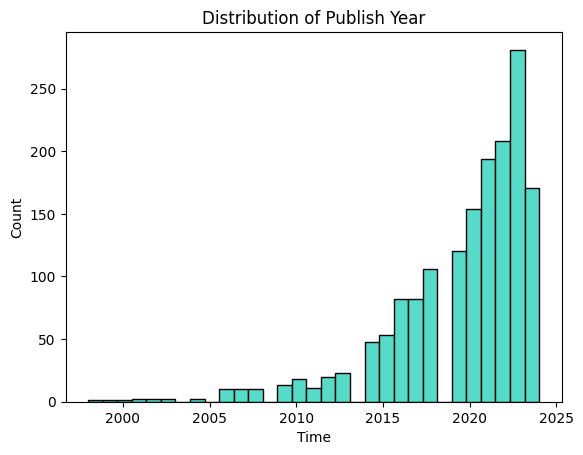

In [172]:
plt.hist(df['PUBLISH_YEAR'], bins='auto', color=feature_color_map['PUBLISH_YEAR'], edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Publish Year')
plt.show()

In [173]:
df['PUBLISH_YEAR'].describe()

count    1625.000000
mean     2019.595077
std         4.093847
min      1998.000000
25%      2018.000000
50%      2021.000000
75%      2023.000000
max      2024.000000
Name: PUBLISH_YEAR, dtype: float64

### Plot the average `24_HOUR_PEAK` for each year (`PUBLISH_YEAR`)

In [174]:
print(sorted(df["PUBLISH_YEAR"].unique()))

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


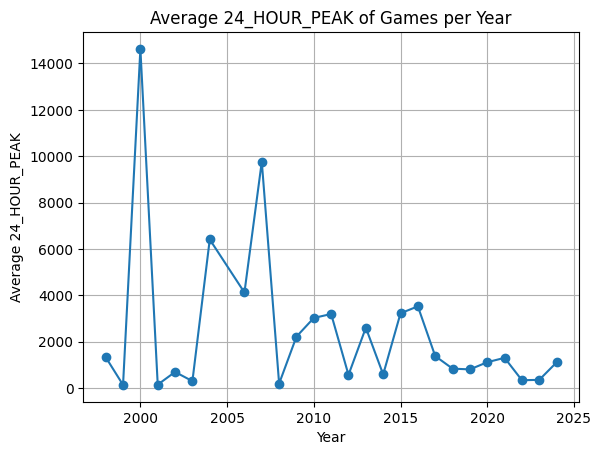

In [175]:
average_peak24_per_year = df.groupby('PUBLISH_YEAR')['24_HOUR_PEAK'].mean()

plt.plot(average_peak24_per_year.index, average_peak24_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average 24_HOUR_PEAK')
plt.title('Average 24_HOUR_PEAK of Games per Year')
plt.grid(True)
plt.show()

### `Platform` Analysis

OS: Linux 2250.856796116505
OS: Windows 1183.9236923076924
OS: macOS 1575.9123376623377


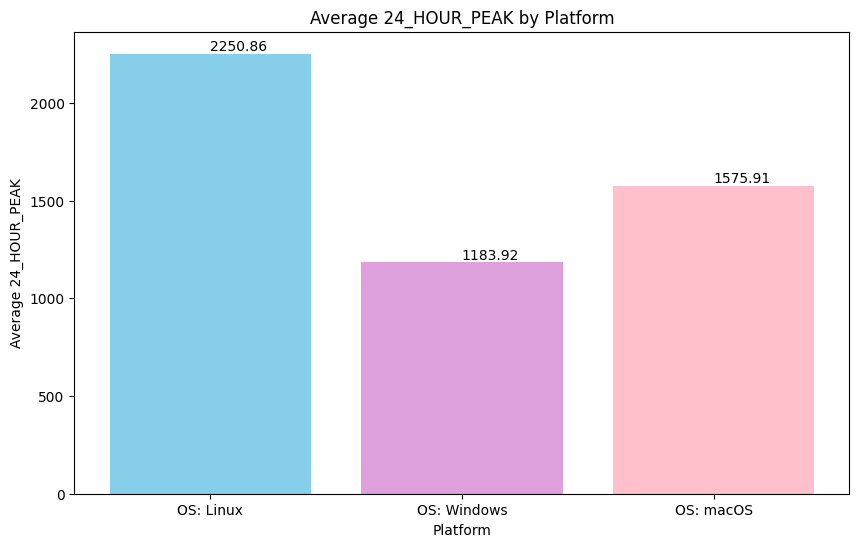

In [176]:
averages = []
for platform in platforms:
    avg = df.loc[df[platform] == 1, '24_HOUR_PEAK'].mean()
    averages.append(avg)
    print(platform, avg)
colors = ['skyblue', 'plum', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(platforms, averages, color=colors)

for bar, avg in zip(bars, averages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(avg, 2), va='bottom')  # va: vertical alignment

plt.title('Average 24_HOUR_PEAK by Platform')
plt.xlabel('Platform')
plt.ylabel('Average 24_HOUR_PEAK')
plt.show()

del averages


In [177]:
df['PLATFORM_COUNT'] = df[platforms].sum(axis=1)

platform_groups = df.groupby('PLATFORM_COUNT').agg({
    '24_HOUR_PEAK': 'mean'
})

platform_groups.reset_index(inplace=True)

platform_groups

,PLATFORM_COUNT,24_HOUR_PEAK
0,1,869.260188
1,2,928.159091
2,3,2239.225000


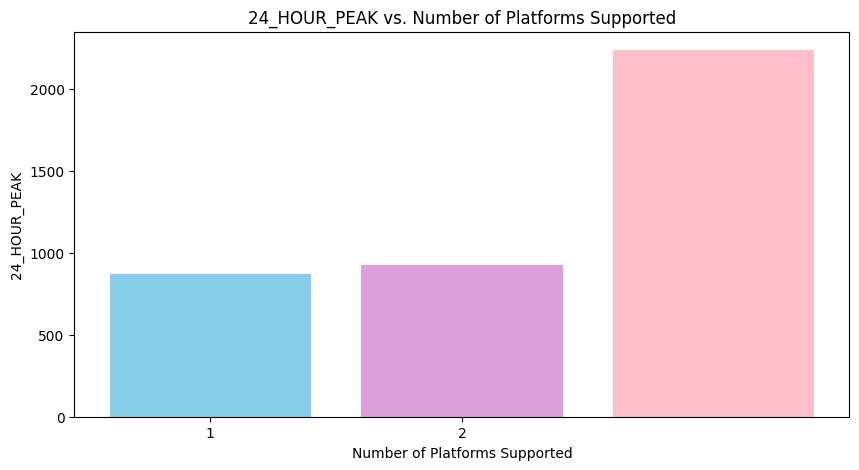

In [178]:
colors = ['skyblue', 'plum', 'pink']
metrics = ['24_HOUR_PEAK']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PLATFORM_COUNT'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 3))
    plt.show()

###  Relation between `24_HOUR_PEAK` and `STORE_GENRE`

GENRE: Action 1658.5988023952095
GENRE: Adventure 815.9659239842726
GENRE: Casual 564.8975791433892
GENRE: Early Access 1766.4651162790697
GENRE: Free to Play 1776.7156862745098
GENRE: Indie 856.4025617566331
GENRE: Massively Multiplayer 1549.7333333333333
GENRE: RPG 1871.0324483775812
GENRE: Racing 1933.952380952381
GENRE: Simulation 1811.7238605898124
GENRE: Sports 1995.46875
GENRE: Store Genres 110.0
GENRE: Strategy 1643.9655172413793


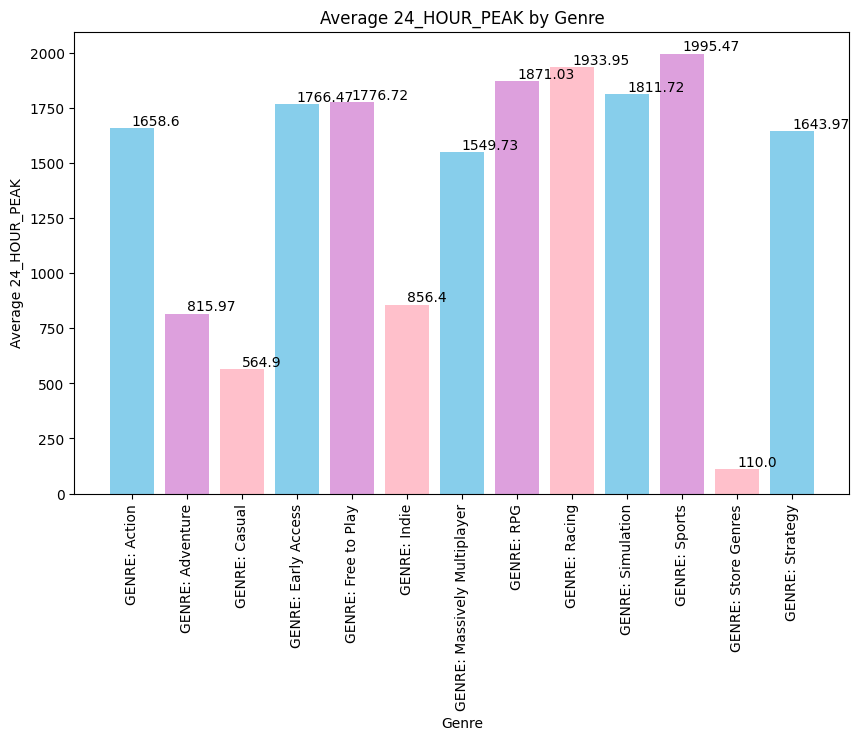

In [179]:
averages = []
for genre in genres:
    avg = df.loc[df[genre] == 1, '24_HOUR_PEAK'].mean()
    averages.append(avg)
    print(genre, avg)
colors = ['skyblue', 'plum', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(genres, averages, color=colors)

for bar, avg in zip(bars, averages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(avg, 2), va='bottom')  # va: vertical alignment

plt.title('Average 24_HOUR_PEAK by Genre')
plt.xlabel('Genre')
plt.ylabel('Average 24_HOUR_PEAK')
plt.xticks(rotation=90)
plt.show()

In [180]:
df['GENRE_COUNT'] = df[genres].sum(axis=1)

genres_groups = df.groupby('GENRE_COUNT').agg({
    '24_HOUR_PEAK': 'mean'
})

genres_groups.reset_index(inplace=True)

genres_groups

,GENRE_COUNT,24_HOUR_PEAK
0,1,1620.360595
1,2,989.545455
2,3,898.201961
3,4,846.679104
4,5,3279.920455
5,6,1954.093750
6,7,1682.333333
7,8,231.500000
8,9,23.500000


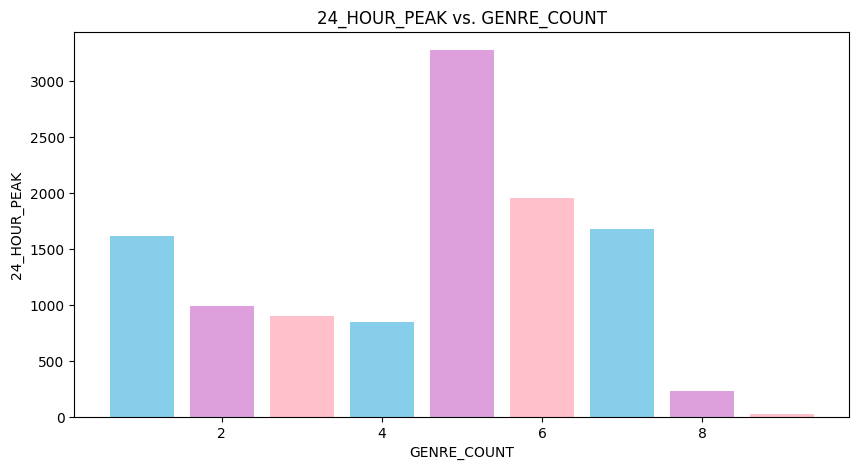

In [181]:
colors = ['skyblue', 'plum', 'pink']
metrics = ['24_HOUR_PEAK']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(genres_groups['GENRE_COUNT'], genres_groups[metric], color=colors)
    plt.xlabel('GENRE_COUNT')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. GENRE_COUNT')
    plt.show()

In [ ]:
# Comparison of Top 20 Games based on Genre

top_20_games = df.sort_values(by='RATING_SCORE', ascending=False).head(20)

top_20_genre_counts = top_20_games['PRIMARY_GENRE'].value_counts().reset_index()
top_20_genre_counts.columns = ['PRIMARY_GENRE', 'COUNT']
print("Top 20 Games by Genre")

plt.figure(figsize=(10, 6))
plt.bar(top_20_genre_counts['PRIMARY_GENRE'], top_20_genre_counts['COUNT'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count of Top 20 Games')
plt.title('Distribution of Genres Among Top 20 Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 GENRES

In [ ]:
# Explode

df['STORE_GENRE'] = df['STORE_GENRE'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_exploded = df.explode('STORE_GENRE')

top_10_genre = df_exploded['STORE_GENRE'].value_counts().nlargest(10).index

df_top_10 = df_exploded[df_exploded['STORE_GENRE'].isin(top_10_genre)]

plt.figure(figsize=(10, 8))

sb.countplot(y='STORE_GENRE', data=df_top_10, order=top_10_genre)
plt.show()

In [ ]:
warnings.filterwarnings("ignore")

df['STORE_GENRE'] = df['STORE_GENRE'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_exploded = df.explode('STORE_GENRE')

genre_avg_price = df_exploded.groupby('STORE_GENRE')['PRICE'].mean().reset_index()

quantiles = genre_avg_price['PRICE'].quantile([0.33, 0.66])

def categorize_price(price):
    if price <= quantiles[0.33]:
        return 'Low'
    elif price <= quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'

genre_avg_price['Price_Category'] = genre_avg_price['PRICE'].apply(categorize_price)

categories = ['High', 'Medium', 'Low']
colors = ['Blues_d', 'Greens_d', 'Reds_d']

In [ ]:
for category, color in zip(categories, colors):
    category_df = genre_avg_price[genre_avg_price['Price_Category'] == category]
    
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(y='STORE_GENRE', x='PRICE', data=category_df, palette=color)
    plt.title(f'Genres with {category} Average Prices')
    plt.xlabel('Average Price')
    plt.ylabel('Genres')
    
    # Annotate the bars with the average price values
    for index, value in enumerate(category_df['PRICE']):
        ax.text(value, index, f'{value:.2f}', color='black', ha="left")
    
    plt.show()

### Analyze the correlation between PRICE and POSITIVE_REVIEWS

In [ ]:

price_positive_corr = df[['PRICE', 'POSITIVE_REVIEWS']].dropna()
correlation = price_positive_corr.corr().loc['PRICE', 'POSITIVE_REVIEWS']

plt.figure(figsize=(10, 6))
sns.regplot(x='PRICE', y='POSITIVE_REVIEWS', data=price_positive_corr, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Price and Positive Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Positive Reviews')
plt.grid(True)
plt.show()

correlation

### Developer Analysis

In [ ]:
developer_game_count = df['DEVELOPERS'].value_counts()

developer_price_summary = df.groupby('DEVELOPERS')['PRICE'].mean().sort_values(ascending=False)

developer_summary = pd.DataFrame({
    'Game Count': developer_game_count,
    'Average Price': developer_price_summary
}).dropna().sort_values(by='Game Count', ascending=False)

developer_summary

### Top 20 DEVELOPERS

In [ ]:

warnings.filterwarnings("ignore")

df_exploded = df.explode('DEVELOPERS')

developer_avg_price = df_exploded.groupby('DEVELOPERS')['PRICE'].mean().reset_index()

grouped = developer_avg_price.groupby('PRICE')['DEVELOPERS'].apply(lambda x: ', '.join(x)).reset_index()

grouped.columns = ['Average Price', 'Developers']

developer_groups = {f'Group {i+1}': names for i, names in enumerate(grouped['Developers'])}

grouped['Developers'] = [f'Group {i+1}' for i in range(len(grouped))]

grouped_sorted = grouped.sort_values(by='Average Price', ascending=False)

top_10_highest_avg_price = grouped_sorted.head(10)

top_10_lowest_avg_price = grouped_sorted.tail(10)

normal_avg_price = grouped_sorted.iloc[10:-10].head(10)

In [ ]:
# Plot the top groups with highest average prices
plt.figure(figsize=(14, 10))
ax1 = sns.barplot(y='Developers', x='Average Price', data=top_10_highest_avg_price, palette='Blues_d')
plt.title('Top 10 Developer Groups with Highest Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Developers')

# Annotate the bars with the average price values
for index, value in enumerate(top_10_highest_avg_price['Average Price']):
    ax1.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

In [ ]:
# Plot the groups with normal average prices
plt.figure(figsize=(14, 10))
ax2 = sns.barplot(y='Developers', x='Average Price', data=normal_avg_price, palette='Greens_d')
plt.title('Developer Groups with Normal Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Developers')

# Annotate the bars with the average price values
for index, value in enumerate(normal_avg_price['Average Price']):
    ax2.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

In [ ]:
# Plot the top groups with lowest average prices
plt.figure(figsize=(14, 10))
ax3 = sns.barplot(y='Developers', x='Average Price', data=top_10_lowest_avg_price, palette='Reds_d')
plt.title('Top 10 Developer Groups with Lowest Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Developers')

# Annotate the bars with the average price values
for index, value in enumerate(top_10_lowest_avg_price['Average Price']):
    ax3.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

In [ ]:
# Print the dictionary with concatenated names
# for group, names in developer_groups.items():
#     print(f'{group}: {names}')

### Relationship between TOTAL_REVIEW and PRICE

In [ ]:
# Plot the relationship between TOTAL_REVIEW and PRICE
plt.scatter(df['TOTAL_REVIEW'], df['PRICE'], alpha=0.5)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.grid(True)
plt.show()


In [ ]:
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='reg', scatter_kws={'alpha':0.5})
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


In [ ]:
# Create a hexbin plot
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='hex', gridsize=20)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


In [ ]:
df.nlargest(20, "TOTAL_REVIEW")["NAME"]

In [ ]:
df['TOTAL_REVIEW'].nlargest(n=25)

In [ ]:
df.query("TOTAL_REVIEW >= 0.99").sort_values(by="TOTAL_REVIEW", ascending=False)[["NAME", "DEVELOPERS", "STORE_GENRE", "TOTAL_REVIEW"]]